# Keras TF 2.0 -Classification Project


## The Data

### Breast cancer wisconsin (diagnostic) dataset


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

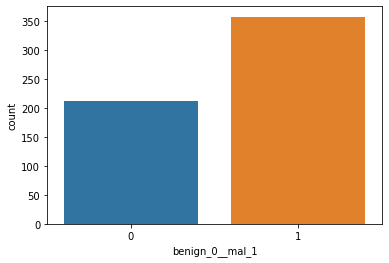

In [7]:
sns.countplot(x='benign_0__mal_1',data=df)

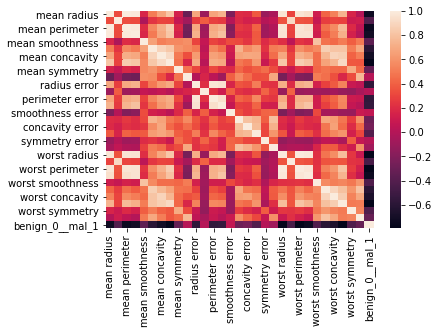

In [8]:
sns.heatmap(df.corr())

In [9]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

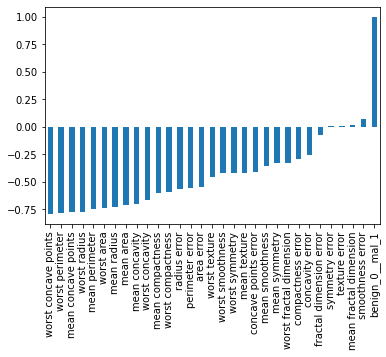

In [10]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

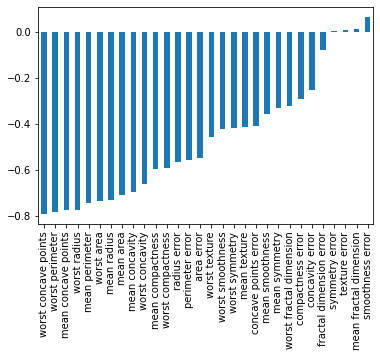

In [11]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

## Train Test Split

In [12]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(X_train)

MinMaxScaler()

In [18]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [20]:
X_train.shape

(426, 30)

In [21]:
model = Sequential()


model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

## Training the Model 

Choosing too many epochs and overfitting!

In [22]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
14/14 [==============================] - 0s 12ms/step - loss: 0.6781 - val_loss: 0.6549
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6425 - val_loss: 0.6220
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6035 - val_loss: 0.5809
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5612 - val_loss: 0.5353
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5147 - val_loss: 0.4919
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4662 - val_loss: 0.4372
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4160 - val_loss: 0.3821
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3683 - val_loss: 0.3357
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3289 - val_loss: 0.2992
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2969 - val_loss: 0.2657
Epoch 11

14/14 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.1076
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.1124
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.1063
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0559 - val_loss: 0.1235
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0584 - val_loss: 0.1092
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.1121
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0503 - val_loss: 0.1098
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.1151
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.1112
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0493 - val_loss: 0.1179
Epoch 93/600


14/14 [==============================] - 0s 2ms/step - loss: 0.0485 - val_loss: 0.1339
Epoch 165/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0503 - val_loss: 0.1243
Epoch 166/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0425 - val_loss: 0.1318
Epoch 167/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0420 - val_loss: 0.1343
Epoch 168/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0401 - val_loss: 0.1409
Epoch 169/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0414 - val_loss: 0.1322
Epoch 170/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0398 - val_loss: 0.1408
Epoch 171/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0405 - val_loss: 0.1355
Epoch 172/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0402 - val_loss: 0.1427
Epoch 173/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0425 - val_loss: 0.1299
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0354 - val_loss: 0.1445
Epoch 246/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0400 - val_loss: 0.1364
Epoch 247/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0382 - val_loss: 0.1489
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0340 - val_loss: 0.1440
Epoch 249/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0349 - val_loss: 0.1482
Epoch 250/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0370 - val_loss: 0.1418
Epoch 251/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0338 - val_loss: 0.1565
Epoch 252/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0338 - val_loss: 0.1525
Epoch 253/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0344 - val_loss: 0.1431
Epoch 254/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0359 - val_loss: 0.1580
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0303 - val_loss: 0.1581
Epoch 327/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0297 - val_loss: 0.1647
Epoch 328/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0288 - val_loss: 0.1698
Epoch 329/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0301 - val_loss: 0.1657
Epoch 330/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0283 - val_loss: 0.1515
Epoch 331/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0374 - val_loss: 0.1814
Epoch 332/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0318 - val_loss: 0.1673
Epoch 333/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0429 - val_loss: 0.1603
Epoch 334/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.1395
Epoch 335/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0342 - val_loss: 0.1732
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0289 - val_loss: 0.1675
Epoch 408/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0257 - val_loss: 0.1709
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0244 - val_loss: 0.1649
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0244 - val_loss: 0.1666
Epoch 411/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0261 - val_loss: 0.1740
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0267 - val_loss: 0.1680
Epoch 413/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0301 - val_loss: 0.1521
Epoch 414/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0255 - val_loss: 0.1757
Epoch 415/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0280 - val_loss: 0.1730
Epoch 416/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0255 - val_loss: 0.1545
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0217 - val_loss: 0.1947
Epoch 489/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0229 - val_loss: 0.1767
Epoch 490/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0244 - val_loss: 0.1810
Epoch 491/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0250 - val_loss: 0.1627
Epoch 492/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0204 - val_loss: 0.1848
Epoch 493/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0222 - val_loss: 0.1653
Epoch 494/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0243 - val_loss: 0.2092
Epoch 495/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0278 - val_loss: 0.1582
Epoch 496/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0275 - val_loss: 0.2163
Epoch 497/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0241 - val_loss: 0.1659
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0190 - val_loss: 0.1811
Epoch 570/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0256 - val_loss: 0.2048
Epoch 571/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0226 - val_loss: 0.1806
Epoch 572/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0185 - val_loss: 0.1823
Epoch 573/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0196 - val_loss: 0.1779
Epoch 574/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0179 - val_loss: 0.1940
Epoch 575/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0178 - val_loss: 0.1921
Epoch 576/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0209 - val_loss: 0.1787
Epoch 577/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0246 - val_loss: 0.2242
Epoch 578/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0207 - val_loss: 0.1724
Epoc

In [23]:
# model.history.history

In [24]:
model_loss = pd.DataFrame(model.history.history)

In [25]:
# model_loss

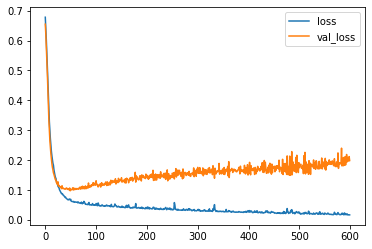

In [26]:
model_loss.plot()

## Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [27]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [30]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6829 - val_loss: 0.6651
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6484 - val_loss: 0.6322
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6132 - val_loss: 0.5954
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5754 - val_loss: 0.5566
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5340 - val_loss: 0.5106
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4899 - val_loss: 0.4634
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4389 - val_loss: 0.4120
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3934 - val_loss: 0.3630
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3469 - val_loss: 0.3230
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3113 - val_loss: 0.2850
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.0562 - val_loss: 0.1120
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0533 - val_loss: 0.1194
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0536 - val_loss: 0.1073
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0533 - val_loss: 0.1151
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0526 - val_loss: 0.1146
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0520 - val_loss: 0.1092
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.1162
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.1118
Epoch 00090: early stopping


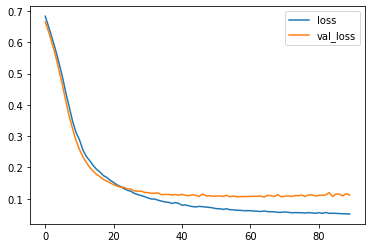

In [31]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

 ## Adding in DropOut Layers

In [32]:
from tensorflow.keras.layers import Dropout

In [33]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [34]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.7680 - val_loss: 0.7089
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.7180 - val_loss: 0.6750
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6872 - val_loss: 0.6591
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6716 - val_loss: 0.6448
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6539 - val_loss: 0.6237
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6504 - val_loss: 0.6035
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6259 - val_loss: 0.5809
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5972 - val_loss: 0.5515
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5742 - val_loss: 0.5196
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5785 - val_loss: 0.5017
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.1121 - val_loss: 0.0903
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1599 - val_loss: 0.0936
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1111 - val_loss: 0.0933
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1447 - val_loss: 0.0944
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1176 - val_loss: 0.0918
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1105 - val_loss: 0.0947
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1104 - val_loss: 0.0894
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1163 - val_loss: 0.0961
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1237 - val_loss: 0.0865
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1393 - val_loss: 0.0901
Epoch 93/600


14/14 [==============================] - 0s 4ms/step - loss: 0.0785 - val_loss: 0.1003
Epoch 165/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0886 - val_loss: 0.0979
Epoch 00165: early stopping


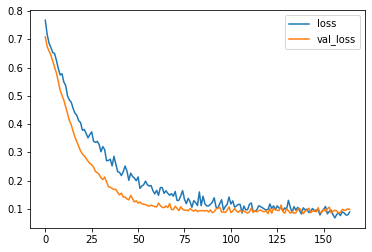

In [35]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [36]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.99      0.94      0.97        88

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [39]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 5 83]]
